In [1]:
import spotscope as ss
import scanpy as sc

/home/lengjc/.conda/envs/spotscope/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# Pretraining stage, if have pretrained, please comment this part.

# ss.train(
#     exp_name='ckpt/test.pt',
#     max_epochs=150,
#     model=ss.CLIPModel(
#         temperature=0.01,
#         image_embedding=1024,
#         spot_embedding=4,
#         projection_dim=128
#     ),
#     dataset_paths=[
#         "example_data/MOB_celltype/mouse_bolb_1.h5ad",
#         "example_data/MOB_celltype/mouse_bolb_2.h5ad",
#         "example_data/MOB_celltype/mouse_bolb_3.h5ad",
#         "example_data/MOB_celltype/mouse_bolb_4.h5ad",
#         "example_data/MOB_celltype/mouse_bolb_5.h5ad",
#         "example_data/MOB_celltype/mouse_bolb_6.h5ad",
#         "example_data/MOB_celltype/mouse_bolb_7.h5ad",
#         "example_data/MOB_celltype/mouse_bolb_8.h5ad",
#     ],
#     batch_size=512,
#     seed=42,
#     train_ratio=0.8
# )


In [2]:
# load query data
adata = sc.read_h5ad("example_data/MOB_celltype/mouse_bolb_12.h5ad")

In [4]:
# It's best to read the reference data, but if it's not available, this step can be skipped.
# ss.load_key_datasets(adata, dataset_paths=[
#             "example_data/MOB_celltype/mouse_bolb_1.h5ad",
#             "example_data/MOB_celltype/mouse_bolb_2.h5ad",
#             "example_data/MOB_celltype/mouse_bolb_3.h5ad",
#             "example_data/MOB_celltype/mouse_bolb_4.h5ad",
#             "example_data/MOB_celltype/mouse_bolb_5.h5ad",
#             "example_data/MOB_celltype/mouse_bolb_6.h5ad",
#             "example_data/MOB_celltype/mouse_bolb_7.h5ad",
#             "example_data/MOB_celltype/mouse_bolb_8.h5ad",
#         ])

Building key loaders
Finished building key loaders


In [3]:
# load pretrained model weight

ss.load_model(
    adata,
    model_path="ckpt/mob_celltype.pt",
    model=ss.CLIPModel(temperature=0.01,
                       image_embedding=1024,
                       spot_embedding=4,
                       projection_dim=128),
)

/nas/ljc/Spotscope/spotscope/utils.py:115: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(model_path)


Finished loading model


In [4]:
ss.load_query_datasets(adata=adata)

Building query loaders
Finished building query loaders


In [5]:
ss.infer(adata=adata,  topk=50)

Getting image embeddings...


100%|██████████| 9/9 [00:01<00:00,  5.85it/s]


Getting spot embeddings...
Getting query coordinates...


100%|██████████| 9/9 [00:00<00:00, 27.40it/s]

Querying...


In [6]:
adata

AnnData object with n_obs × n_vars = 280 × 8237
    obs: 'n_genes', 'uniform_density', 'rna_count_based_density'
    var: 'n_cells', 'sparsity'
    uns: 'annotation_list', 'overlap_genes', 'spatial', 'training_genes', 'query_dataloaders', 'query_dataset', 'query_data_size', 'query_img_embeddings', 'key_spot_embeddings', 'key_annotations', 'spot_coordinates'
    obsm: 'annotations', 'spatial', 'tangram_ct_pred', 'inferred_spot_embeddings', 'inferred_spot_annotations'

In [7]:
celltypes = adata.uns['annotation_list']

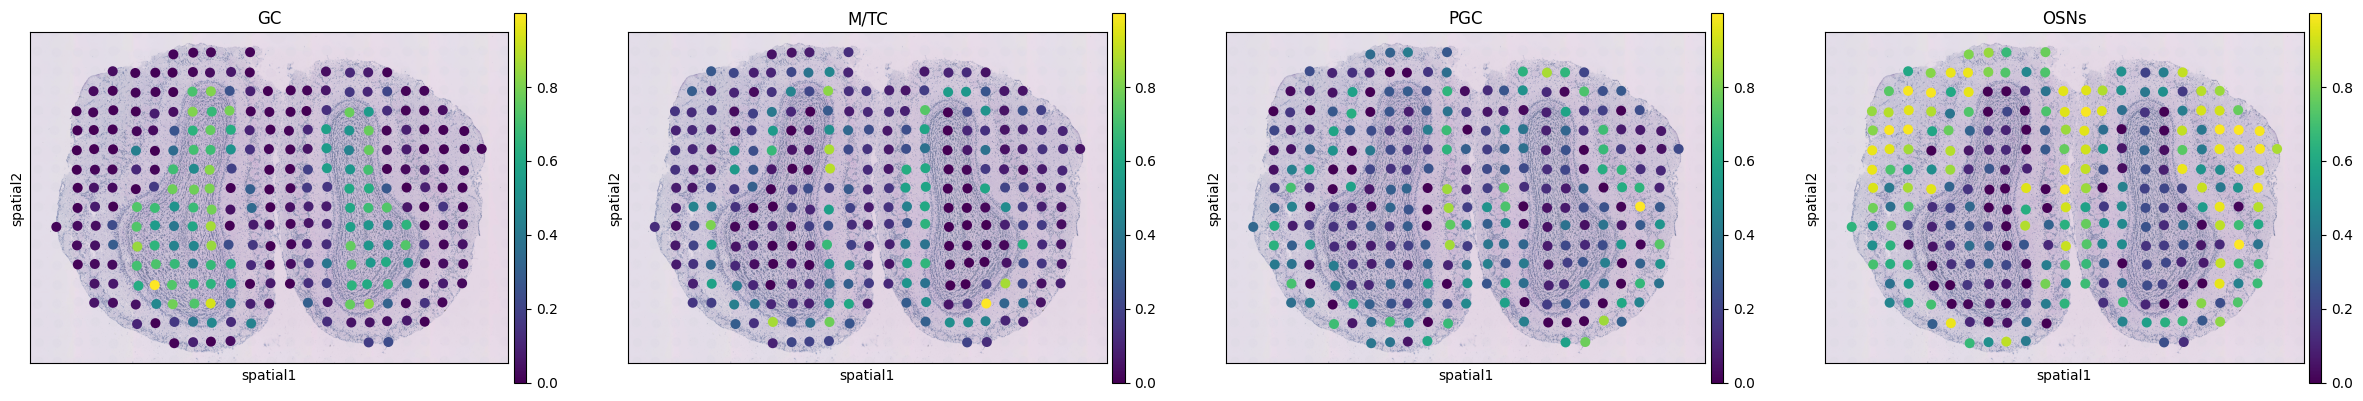

In [8]:
ss.plot_annotations(adata, annotation_key='inferred_spot_annotations')

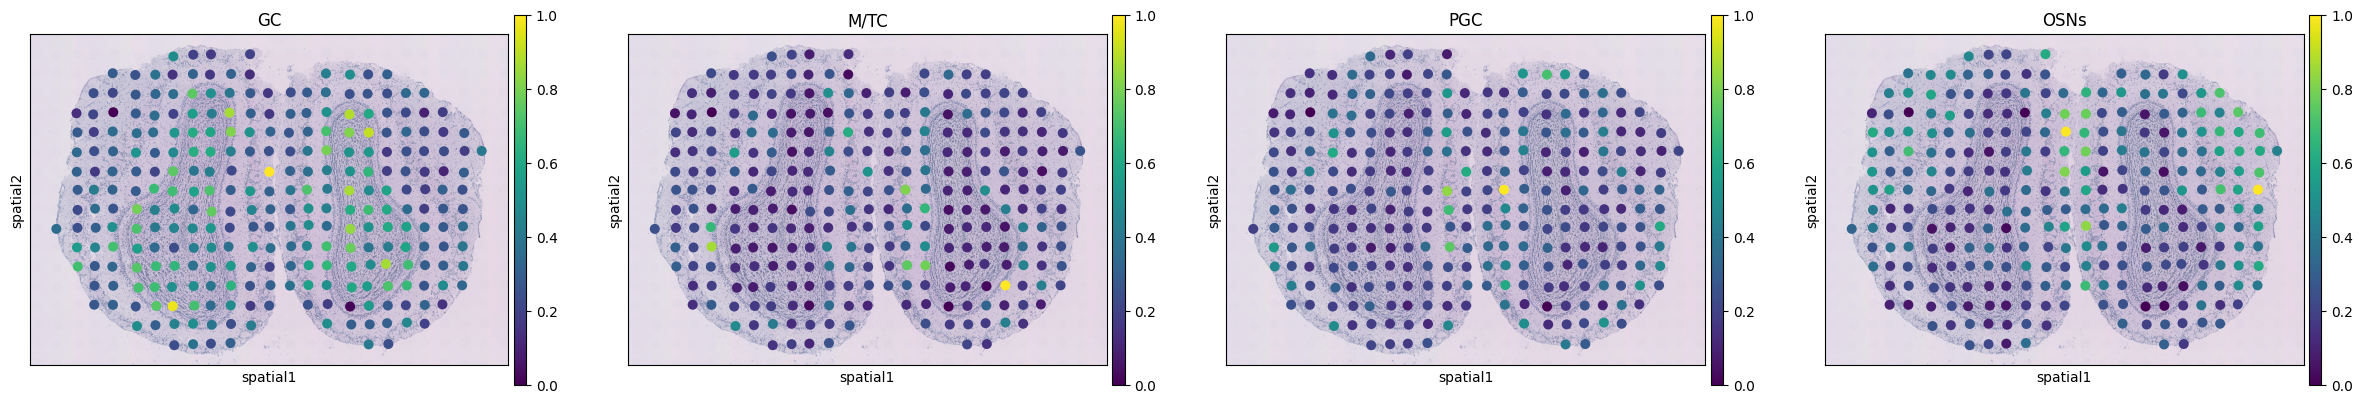

In [9]:
ss.plot_annotations(adata, annotation_key='annotations')

### Super-resolution inference

In [10]:
adata_super = ss.super_infer(adata, topk=50, scale=10, distance_threshold=160, lower_perc=0.1, mode='advanced')

Building query loaders
Finished building query loaders
Getting image embeddings...


100%|██████████| 626/626 [00:35<00:00, 17.86it/s]


Getting query coordinates...


100%|██████████| 626/626 [00:07<00:00, 87.27it/s]


Querying...


In [11]:
adata_super

AnnData object with n_obs × n_vars = 20011 × 8237
    uns: 'spatial', 'query_dataloaders', 'query_dataset', 'query_data_size', 'query_img_embeddings', 'key_spot_embeddings', 'key_annotations', 'spot_coordinates', 'annotation_list'
    obsm: 'spatial', 'inferred_spot_embeddings', 'inferred_spot_annotations'

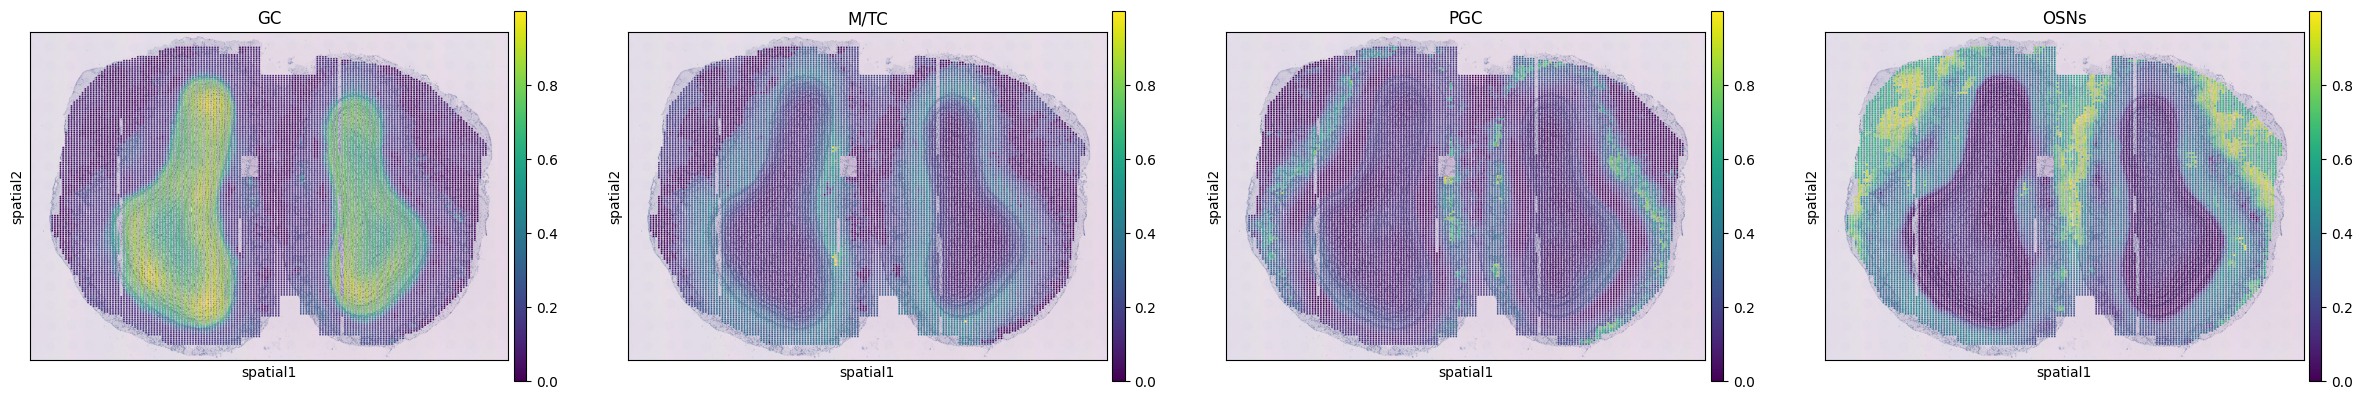

In [12]:
ss.plot_annotations(adata_super, annotation_key='inferred_spot_annotations')